# Data & libraries

## Libraries

In [1]:
# -- Install packages.
# install.packages("e1071")
# install.packages(“ISLR”)
# install.packages(“ggplot2”) 
# install.packages(“plyr”)
# install.packages(“dplyr”) 
# install.packages(“class”)
# install.packages("corrplot")
# install.packages("caret")
# install.packages("tidyverse")
# install.packages("hrbrthemes")

# -- Load libraries
library(e1071) # svm
library(ggplot2)
library(reshape2)
library(plyr); library(dplyr) # pipes
library(class) # classification lib
library(corrplot) # correlation plot lib
#library(caret) # more advanced classification lib
#library(hrbrthemes)

# Sampling settings
RNGkind(sample.kind = "Rounding")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Warning message in RNGkind(sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


## Importing CSV

In [2]:
MobilePrice <- read.csv("mobile_project.csv")
dim(MobilePrice)
head(MobilePrice)

[1] 500  21

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
2,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
3,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
4,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
5,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
6,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1


## Split data into train/test

In [3]:
df <- MobilePrice
set.seed(1)
train <- sample(nrow(df), 0.8*nrow(df))
str(df)

'data.frame':	500 obs. of  21 variables:
 $ battery_power: int  842 1021 563 615 1821 1859 1821 1954 1445 509 ...
 $ blue         : int  0 1 1 1 1 0 0 0 1 1 ...
 $ clock_speed  : num  2.2 0.5 0.5 2.5 1.2 0.5 1.7 0.5 0.5 0.6 ...
 $ dual_sim     : int  0 1 1 0 0 1 0 1 0 1 ...
 $ fc           : int  1 0 2 0 13 3 4 0 0 2 ...
 $ four_g       : int  0 1 1 0 1 0 1 0 0 1 ...
 $ int_memory   : int  7 53 41 10 44 22 10 24 53 9 ...
 $ m_dep        : num  0.6 0.7 0.9 0.8 0.6 0.7 0.8 0.8 0.7 0.1 ...
 $ mobile_wt    : int  188 136 145 131 141 164 139 187 174 93 ...
 $ n_cores      : int  2 3 5 6 2 1 8 4 7 5 ...
 $ pc           : int  2 6 6 9 14 7 10 0 14 15 ...
 $ px_height    : int  20 905 1263 1216 1208 1004 381 512 386 1137 ...
 $ px_width     : int  756 1988 1716 1786 1212 1654 1018 1149 836 1224 ...
 $ ram          : int  2549 2631 2603 2769 1411 1067 3220 700 1099 513 ...
 $ sc_h         : int  9 17 11 16 8 17 13 16 17 19 ...
 $ sc_w         : int  7 3 2 8 2 1 8 3 1 10 ...
 $ talk_time    : in

In [4]:
X.train <- df[train,]
X.train$price_range <- NULL
y.train <- as.factor(df[train, "price_range"])

dim(X.train)
length(y.train)

[1] 400  20

[1] 400

In [5]:
X.test <- df[-train,]
X.test$price_range <- NULL
y.test <- as.factor(df[-train, "price_range"])

dim(X.test)
length(y.test)

[1] 100  20

[1] 100

# Exploratory Data Analysis

In [6]:
df2 <- mutate_all(df, function(x) as.numeric(as.character(x))) # for compatability
str(df2)

'data.frame':	500 obs. of  21 variables:
 $ battery_power: num  842 1021 563 615 1821 ...
 $ blue         : num  0 1 1 1 1 0 0 0 1 1 ...
 $ clock_speed  : num  2.2 0.5 0.5 2.5 1.2 0.5 1.7 0.5 0.5 0.6 ...
 $ dual_sim     : num  0 1 1 0 0 1 0 1 0 1 ...
 $ fc           : num  1 0 2 0 13 3 4 0 0 2 ...
 $ four_g       : num  0 1 1 0 1 0 1 0 0 1 ...
 $ int_memory   : num  7 53 41 10 44 22 10 24 53 9 ...
 $ m_dep        : num  0.6 0.7 0.9 0.8 0.6 0.7 0.8 0.8 0.7 0.1 ...
 $ mobile_wt    : num  188 136 145 131 141 164 139 187 174 93 ...
 $ n_cores      : num  2 3 5 6 2 1 8 4 7 5 ...
 $ pc           : num  2 6 6 9 14 7 10 0 14 15 ...
 $ px_height    : num  20 905 1263 1216 1208 ...
 $ px_width     : num  756 1988 1716 1786 1212 ...
 $ ram          : num  2549 2631 2603 2769 1411 ...
 $ sc_h         : num  9 17 11 16 8 17 13 16 17 19 ...
 $ sc_w         : num  7 3 2 8 2 1 8 3 1 10 ...
 $ talk_time    : num  19 7 9 11 15 10 18 5 20 12 ...
 $ three_g      : num  0 1 1 1 1 1 1 1 1 1 ...
 $ touch_scr

## Distribution plot

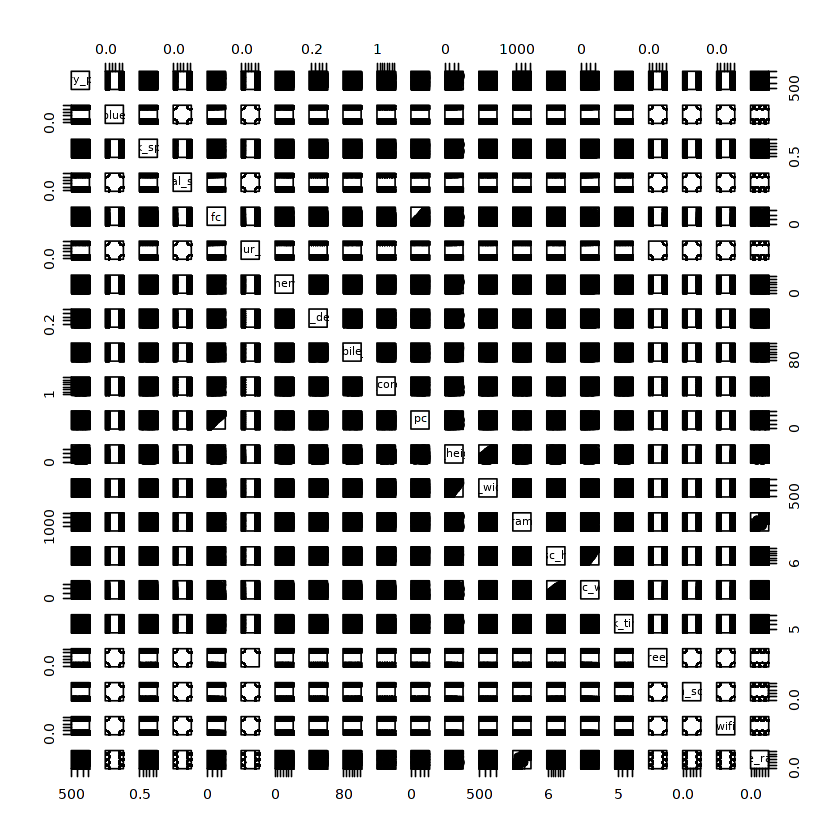

In [7]:
plot(df2)

## Correlation Matrix

> We can use a correlation matrix to figure out whether there are any highly correlated features.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.0000000000,0.0557746397,0.0235231617,-0.053317824,0.0449146161,0.024371579,0.035428897,-0.007141934,0.0533476248,-0.114405238,...,0.053917051,0.0396699157,0.052706783,-0.026433011,-3.601270e-02,0.100272519,-0.028500581,0.0001892976,0.0035455982,0.232850729
blue,0.0557746397,1.0000000000,0.0688106065,0.046612719,0.0172748878,-0.008701588,0.059473905,-0.032326920,-0.0001463648,0.015454246,...,-0.057759891,-0.0834332297,0.059449324,-0.005339504,2.593371e-03,-0.039492480,-0.052431485,0.0149556709,-0.0314207690,0.039694476
clock_speed,0.0235231617,0.0688106065,1.0000000000,0.032432090,0.0002570597,-0.017999280,0.008567047,-0.087435564,0.0252375835,0.010674259,...,-0.009659530,0.0013744561,-0.002509480,0.037755458,-4.527137e-02,-0.024579707,-0.042101480,0.0485289473,-0.0265345959,-0.016376840
dual_sim,-0.0533178237,0.0466127192,0.0324320902,1.000000000,0.0260297534,-0.035184605,0.019103916,-0.014456372,-0.0991478792,0.031597845,...,-0.052003713,-0.0075610296,0.098207488,-0.032975457,8.751537e-03,-0.070977807,-0.082216367,0.0374137687,-0.0286110366,0.073062029
fc,0.0449146161,0.0172748878,0.0002570597,0.026029753,1.0000000000,-0.019320716,-0.042563278,0.040989953,-0.0375372471,-0.055529882,...,0.056572708,-0.0336503301,-0.008669736,-0.063883035,-3.062839e-02,-0.032011675,-0.001570405,-0.0027687866,0.0618369664,0.016406712
four_g,0.0243715788,-0.0087015875,-0.0179992804,-0.035184605,-0.0193207159,1.000000000,0.024212434,-0.016680525,-0.0097344236,-0.062613176,...,-0.026242714,-0.0047344718,-0.002185162,0.048514676,1.478350e-02,-0.036543953,0.589286421,0.0526062302,-0.0127951508,0.011161376
int_memory,0.0354288970,0.0594739055,0.0085670469,0.019103916,-0.0425632777,0.024212434,1.000000000,0.085309455,0.0332242202,-0.020956182,...,0.042827001,0.0403874420,0.070988526,0.065614138,-6.910624e-03,0.036033569,0.031886144,0.0264903317,-0.0710038926,0.092492161
m_dep,-0.0071419341,-0.0323269204,-0.0874355640,-0.014456372,0.0409899528,-0.016680525,0.085309455,1.000000000,-0.0127109025,-0.023813979,...,-0.004872656,0.0443817033,-0.024157105,-0.037579865,-1.657041e-02,-0.022880835,-0.016546113,0.0321374087,-0.0226280101,-0.026255364
mobile_wt,0.0533476248,-0.0001463648,0.0252375835,-0.099147879,-0.0375372471,-0.009734424,0.033224220,-0.012710902,1.0000000000,0.004503551,...,0.020025532,-0.0064597285,-0.045355612,-0.068993530,-6.298208e-02,0.046973552,0.004023422,-0.0631306667,0.0610908566,-0.059666841
n_cores,-0.1144052382,0.0154542458,0.0106742592,0.031597845,-0.0555298823,-0.062613176,-0.020956182,-0.023813979,0.0045035513,1.000000000,...,0.022757989,0.0039549936,0.009478015,-0.001066317,7.335386e-02,-0.037470718,-0.015966135,-0.0216988551,0.0273878162,0.001431282


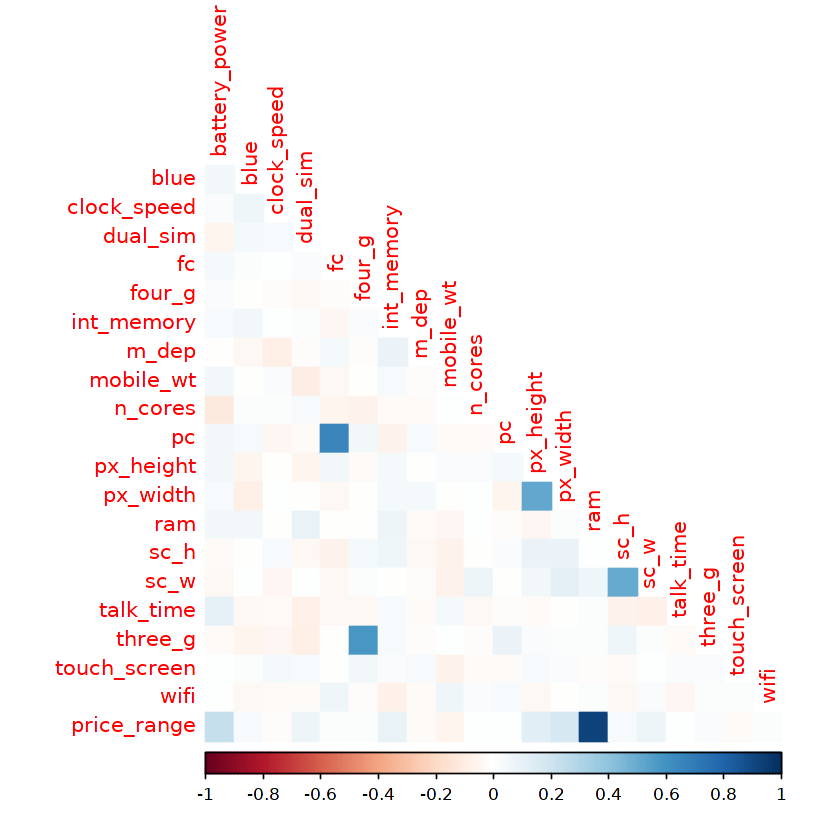

In [8]:
corMatrix = cor(df2)
corrplot(corMatrix, method = 'color', type = 'lower', diag=FALSE)
mydata.cor = cor(df2)
mydata.cor

## Closer look at certain features

<b> Based on the corplot & distribution plot we should investigate </b>
* fc vs pc
* four_g vs three_g
* px_height vs px_width
* sc_h vs sc_w

<b> Note: </b>
* Ram is highly corelated to price_range and is probably a very good feature.

### fc vs pc

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    3.00    4.44    7.00   18.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    4.00   10.00   10.09   15.00   20.00 

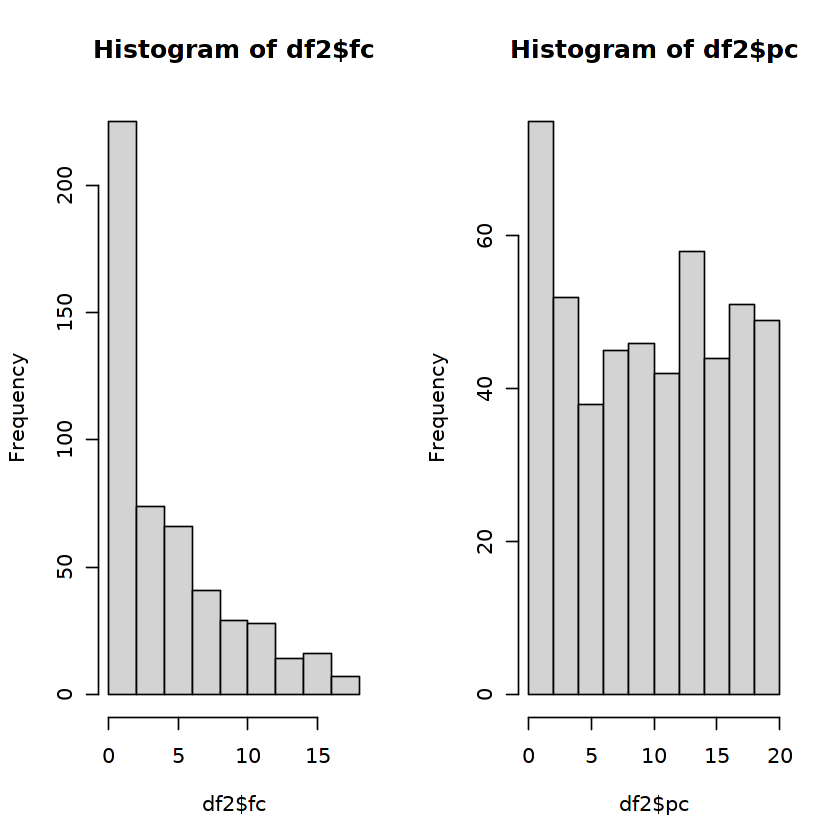

In [9]:
summary(df2$fc)
summary(df2$pc)

par(mfrow=c(1,2))
hist(df2$fc)
hist(df2$pc)

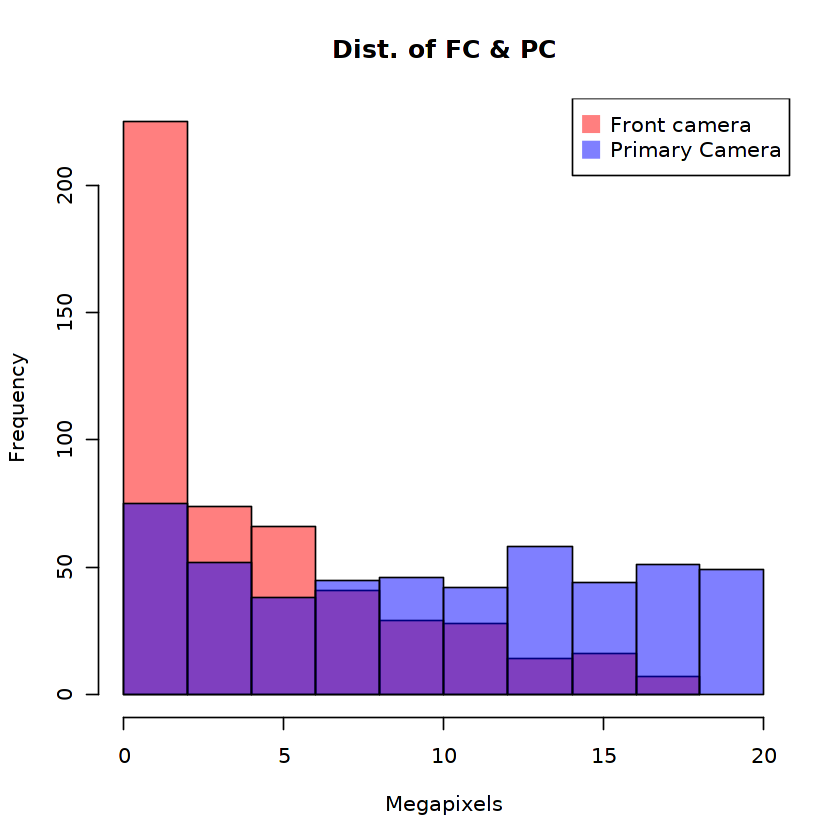

In [10]:
hist(df2$fc, breaks=10, xlim=c(0,20), col=rgb(1,0,0,0.5), xlab="Megapixels" , main="Dist. of FC & PC")

# Second with add=T to plot on top
hist(df2$pc, breaks=10, xlim=c(0,20), col=rgb(0,0,1,0.5), add=T)

# Add legend
legend("topright", legend=c("Front camera","Primary Camera"), col=c(rgb(1,0,0,0.5), 
     rgb(0,0,1,0.5)), pt.cex=2, pch=15 )

### four_g vs three_g

In [11]:
summary(df2$four_g)
summary(df2$three_g)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   0.532   1.000   1.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   0.766   1.000   1.000 

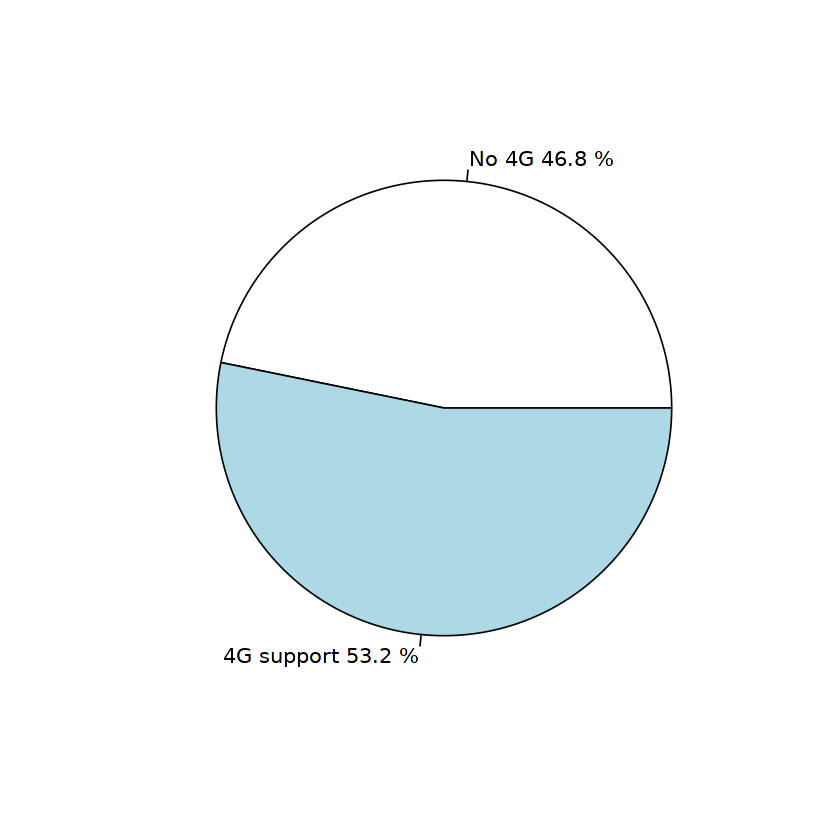

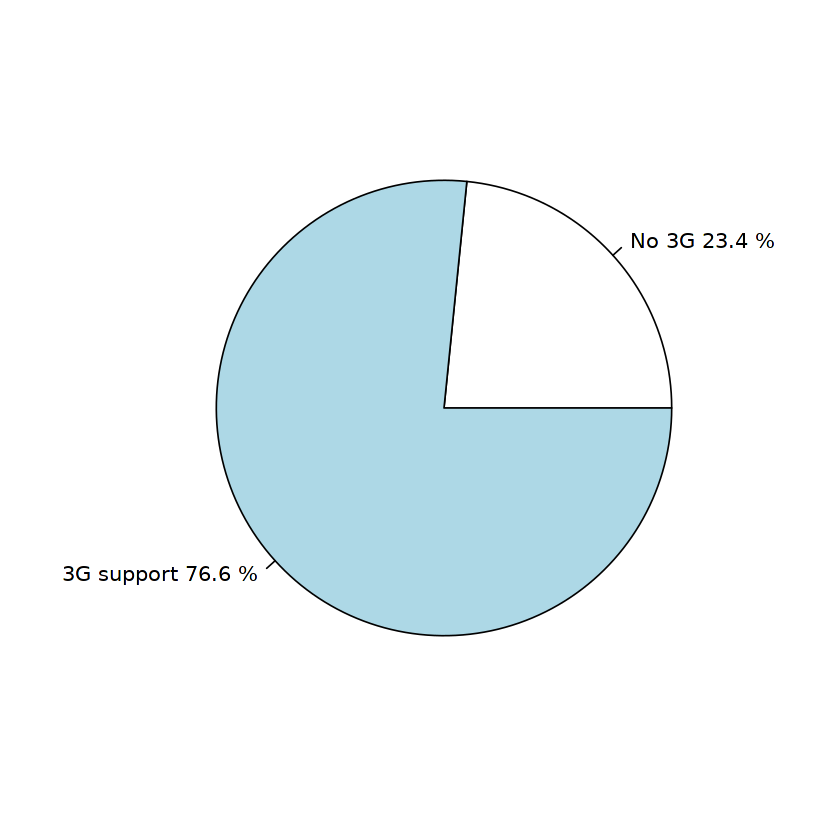

In [12]:
four_g = table(df2$four_g)
pct <- 100 * four_g/sum(four_g)
pie(x=four_g, paste(c("No 4G", "4G support"), sep = " ", pct, "%"))

three_g = table(df2$three_g)
pct <- 100 * three_g/sum(three_g)
pie(x=three_g, paste(c("No 3G", "3G support"), sep = " ", pct, "%"))

### px_height vs px_width

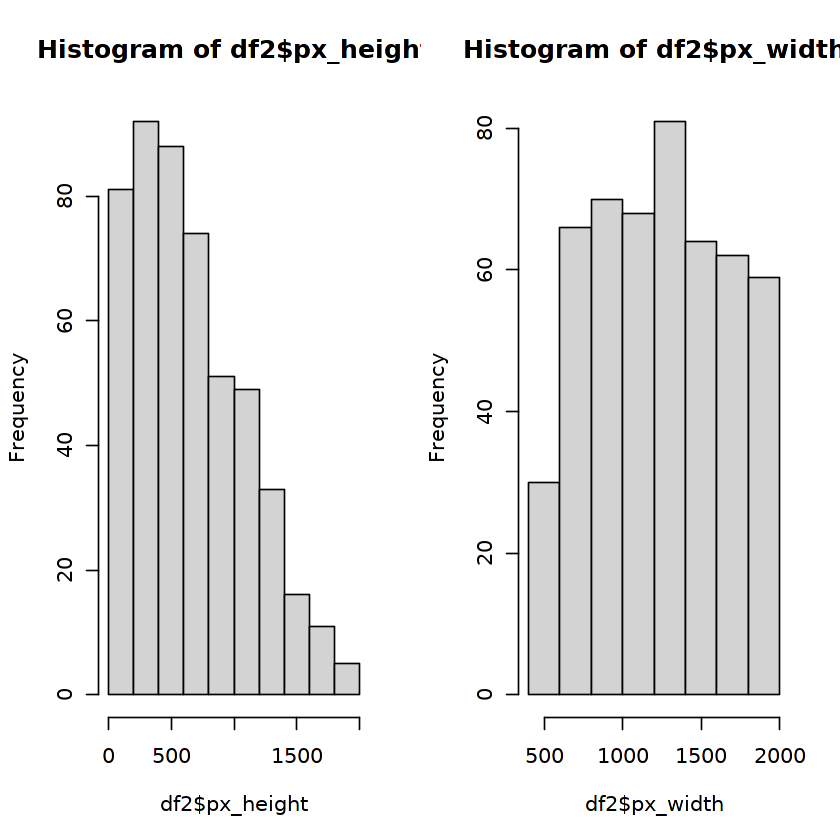

In [13]:
par(mfrow=c(1,2))
hist(df2$px_height)
hist(df2$px_width)

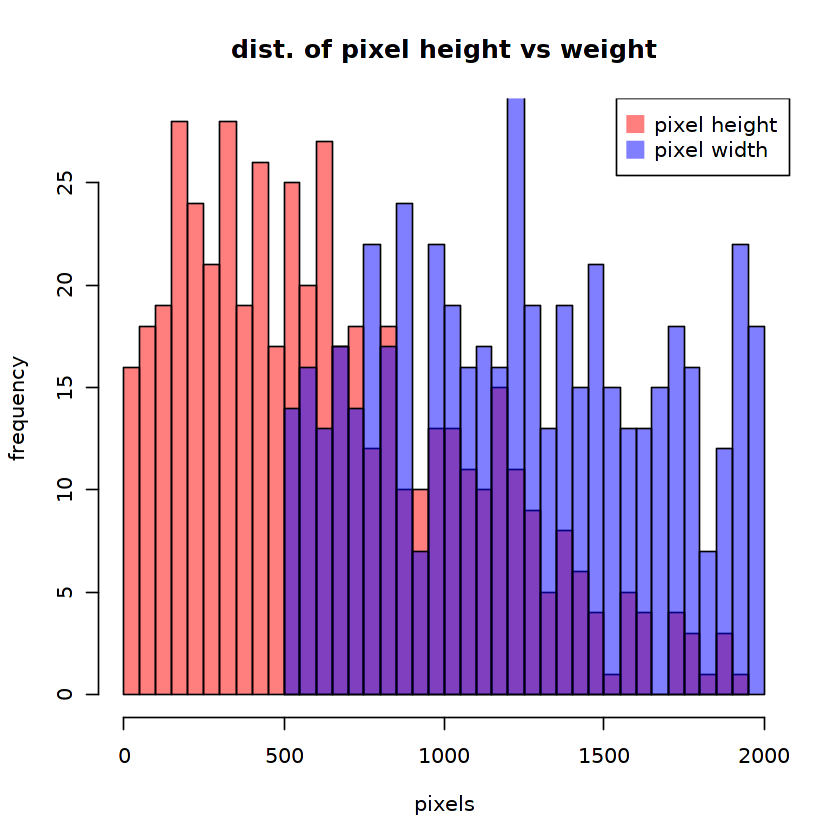

In [14]:
# First distribution
hist(df2$px_height, breaks=30, xlim=c(0,2000), col=rgb(1,0,0,0.5), xlab="pixels", 
     ylab="frequency", main="dist. of pixel height vs weight" )

# Second with add=T to plot on top
hist(df2$px_width, breaks=30, xlim=c(0,2000), col=rgb(0,0,1,0.5), add=T)

# Add legend
legend("topright", legend=c("pixel height","pixel width"), col=c(rgb(1,0,0,0.5), 
     rgb(0,0,1,0.5)), pt.cex=2, pch=15 )

### sc_h vs sc_w

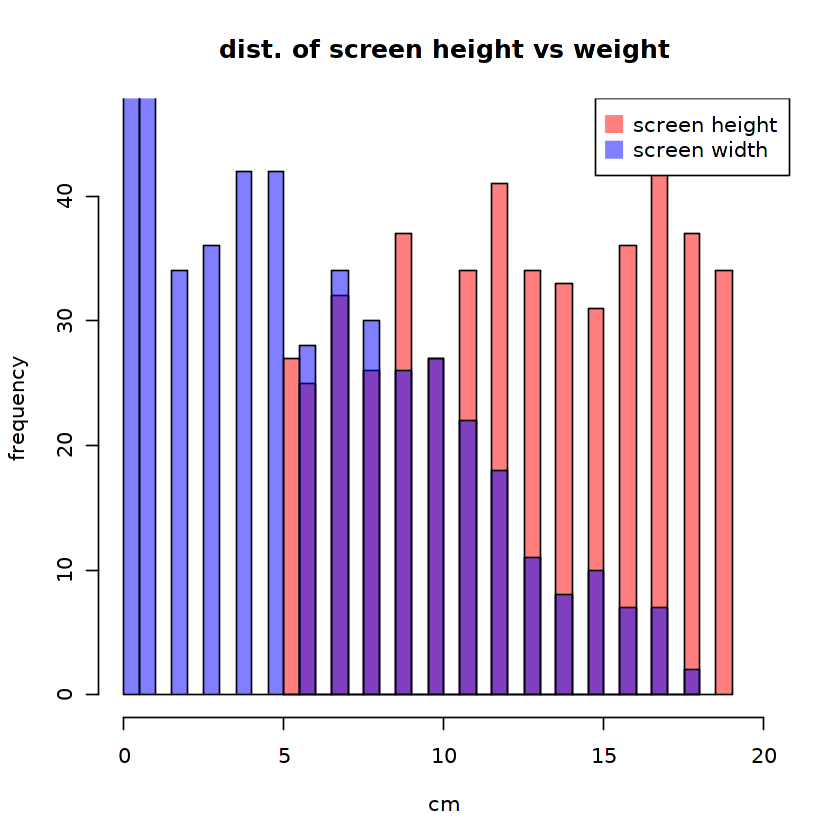

In [15]:
# First distribution
hist(df2$sc_h, breaks=30, xlim=c(0,20), col=rgb(1,0,0,0.5), xlab="cm", 
     ylab="frequency", main="dist. of screen height vs weight" )

# Second with add=T to plot on top
hist(df2$sc_w, breaks=30, xlim=c(0,20), col=rgb(0,0,1,0.5), add=T)

# Add legend
legend("topright", legend=c("screen height","screen width"), col=c(rgb(1,0,0,0.5), 
     rgb(0,0,1,0.5)), pt.cex=2, pch=15 )

# Feature reduction & Standardize

KNN algorithm is very sensitive to high dimensionality of data. We can remove certain highly correlated features and standardize data so they are all similarly scaled to improve the KNN algorithm results. 

- However! Our data is mostly categorical/integers, so scaling will definitely negative effect us!

We will conduct the experiment using both PCA & eliminating identified features. 

## Scale numeric only

In [16]:
# scale numerics columns only
j <- c("clock_speed", "m_dep")

trainS <- scale(X.train[j])
X.train[j] <- trainS
X.test[j] <- scale(X.test[j],
    center = attr(trainS, "scaled:center"), 
    scale = attr(trainS, "scaled:scale")
)

## Pearson's coefficient based elimination

In [17]:
corMatrix[,"fc"]
corMatrix[,"three_g"]
corMatrix[,"px_width"]
corMatrix[,"sc_w"]

battery_power          blue   clock_speed      dual_sim            fc 
 0.0449146161  0.0172748878  0.0002570597  0.0260297534  1.0000000000 
       four_g    int_memory         m_dep     mobile_wt       n_cores 
-0.0193207159 -0.0425632777  0.0409899528 -0.0375372471 -0.0555298823 
           pc     px_height      px_width           ram          sc_h 
 0.6517470499  0.0565727085 -0.0336503301 -0.0086697360 -0.0638830346 
         sc_w     talk_time       three_g  touch_screen          wifi 
-0.0306283883 -0.0320116747 -0.0015704049 -0.0027687866  0.0618369664 
  price_range 
 0.0164067116

battery_power          blue   clock_speed      dual_sim            fc 
 -0.028500581  -0.052431485  -0.042101480  -0.082216367  -0.001570405 
       four_g    int_memory         m_dep     mobile_wt       n_cores 
  0.589286421   0.031886144  -0.016546113   0.004023422  -0.015966135 
           pc     px_height      px_width           ram          sc_h 
  0.082176741   0.021181226   0.017734680   0.011818886   0.065370261 
         sc_w     talk_time       three_g  touch_screen          wifi 
  0.010279696  -0.027298053   1.000000000   0.026268736   0.011357256 
  price_range 
  0.027631175

battery_power          blue   clock_speed      dual_sim            fc 
 0.0396699157 -0.0834332297  0.0013744561 -0.0075610296 -0.0336503301 
       four_g    int_memory         m_dep     mobile_wt       n_cores 
-0.0047344718  0.0403874420  0.0443817033 -0.0064597285  0.0039549936 
           pc     px_height      px_width           ram          sc_h 
-0.0529509989  0.5116825805  1.0000000000  0.0139255748  0.0822746446 
         sc_w     talk_time       three_g  touch_screen          wifi 
 0.1190321646 -0.0083763187  0.0177346802  0.0259673798 -0.0004798294 
  price_range 
 0.1708515051

battery_power          blue   clock_speed      dual_sim            fc 
-3.601270e-02  2.593371e-03 -4.527137e-02  8.751537e-03 -3.062839e-02 
       four_g    int_memory         m_dep     mobile_wt       n_cores 
 1.478350e-02 -6.910624e-03 -1.657041e-02 -6.298208e-02  7.335386e-02 
           pc     px_height      px_width           ram          sc_h 
-6.432113e-05  5.532969e-02  1.190322e-01  6.228446e-02  5.070086e-01 
         sc_w     talk_time       three_g  touch_screen          wifi 
 1.000000e+00 -7.163773e-02  1.027970e-02  9.992759e-03  2.840910e-02 
  price_range 
 7.929652e-02

- Eliminate pc (0.644)

- Eliminate three_g. (0.58)

- Eliminate px_width (0.51)

- Eliminate sc_h (0.506)

In [18]:
features <- !names(X.train) %in% c("pc", "three_g", "px_width", "sc_h")

X.train.new <- X.train[, features]
X.test.new <- X.test[, features]


## PCA

In [19]:
pr.out <- prcomp(df, retx = TRUE, scale = FALSE)
summary(pr.out)

Importance of components:
                             PC1      PC2      PC3       PC4      PC5      PC6
Standard deviation     1094.4472 530.5241 432.3647 299.50257 35.52059 18.17011
Proportion of Variance    0.6815   0.1601   0.1064   0.05104  0.00072  0.00019
Cumulative Proportion     0.6815   0.8416   0.9480   0.99902  0.99974  0.99993
                           PC7     PC8     PC9    PC10  PC11  PC12   PC13
Standard deviation     6.96555 5.50353 5.12065 3.15012 2.918 2.219 0.8086
Proportion of Variance 0.00003 0.00002 0.00001 0.00001 0.000 0.000 0.0000
Cumulative Proportion  0.99995 0.99997 0.99999 0.99999 1.000 1.000 1.0000
                         PC14   PC15   PC16  PC17   PC18   PC19   PC20   PC21
Standard deviation     0.5849 0.5097 0.4997 0.484 0.4765 0.3188 0.2881 0.2765
Proportion of Variance 0.0000 0.0000 0.0000 0.000 0.0000 0.0000 0.0000 0.0000
Cumulative Proportion  1.0000 1.0000 1.0000 1.000 1.0000 1.0000 1.0000 1.0000

We can see that PCA supports our claim that 4 components explain ~99.9% of the variance. We can eliminate rest of the features.

In [20]:
X.train.pca <- pr.out$x[train,1:4]
X.test.pca <- pr.out$x[-train,1:4]

## Domain knowledge

In [21]:
features <- c("battery_power", "int_memory", "mobile_wt", "px_height", "ram")

X.train.dm <- X.train[,features]
X.test.dm <- X.test[,features]

# KNN Classifier 

> Given a positive integer $$K$$ and a test observation $$x_0$$, the **KNN classifier** first identifies the $$K$$ points in the training data that are closest to $$x_0$$, represented by $$\mathcal{N}_0$$. It then estimates the conditional probability for class $$j$$ as the fraction of points in $$\mathcal{N}_0$$ whose response values equal $$j$$.

$$ 
\displaystyle
Pr( Y=j|X=x_{0}) =\frac{1}{K}\sum _{i\in \mathcal{N}_{0}} I( y_{i} =j) 
$$

Recall the **KNN classifer** works by calculating a pairwise distance metric for all observations to a given observation $$x_0$$, then looks at the nearest $$K$$ observations, which we can call the neighborhood $$\mathcal{N}_0$$. We then calculate the probability of $$x_0$$ belonging to a class, for every class using the points in the neighborhood $$\mathcal{N}_0$$ and assign it to the class variable $$j$$ for which it has highest conditional probabilty.

i.e.

$$ 
\underset{j\in Y}{argmax}\left\{\frac{1}{K}\sum _{i\in \mathcal{N}_{0}} I( y_{i} =j)\right\}
$$

## No standardization/reduction

[1] 19.00  0.06


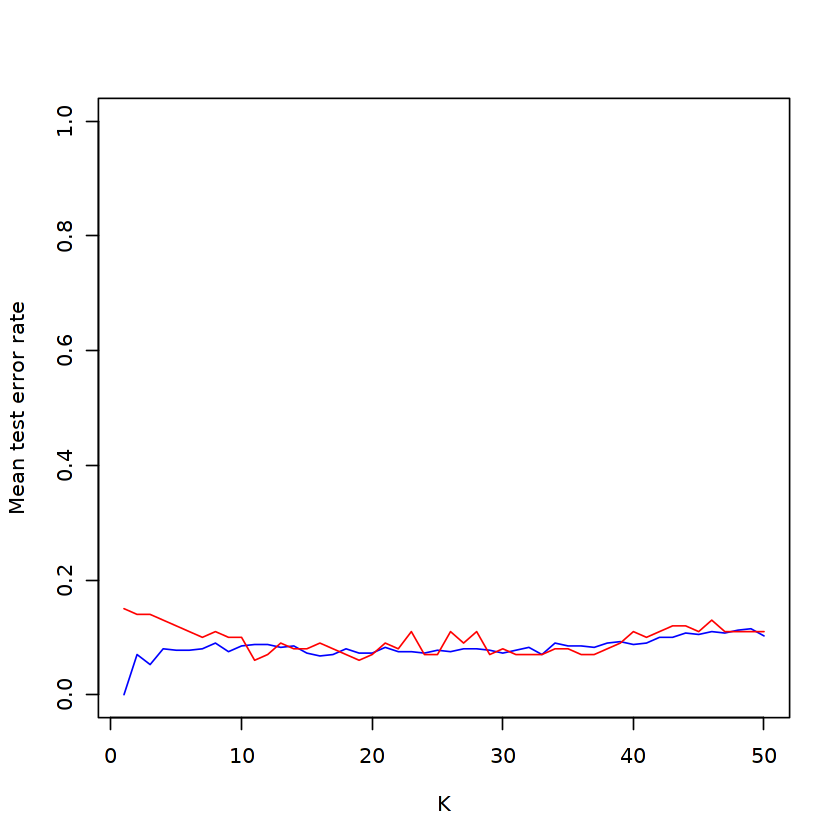

In [22]:
kvalues = 1:50
knn.train.err <- c()
knn.test.err <- c()
for(x in kvalues) {

    knn.pred <- knn(train=X.train, test=X.train, cl=y.train, k=x)
    knn.train.err[x] <- mean(knn.pred != y.train)

    knn.pred <- knn(train=X.train, test=X.test, cl=y.train, k=x)
    knn.test.err[x] <- mean(knn.pred != y.test)

    #cmd <- sprintf("(k=%i) Train err: %f, Test err: %f", x, knn.train.err[x], knn.test.err[x])
    #print(eval(cmd))
}
bestK = max(which(knn.test.err == min(knn.test.err)))

print(c(bestK, knn.test.err[bestK]))
plot(knn.train.err, ylim=c(0,1), xlab="K", ylab="Mean test error rate", type = "l", col="blue")
lines(knn.test.err, type='l', col="red")

## Using selected data

### Train/test performance

[1] 40.00  0.07


      knn.pred
y.test  0  1  2  3
     0 22  1  0  0
     1  1 25  2  0
     2  0  0 23  2
     3  0  0  1 23

[1] 0.78

[1] 0.07

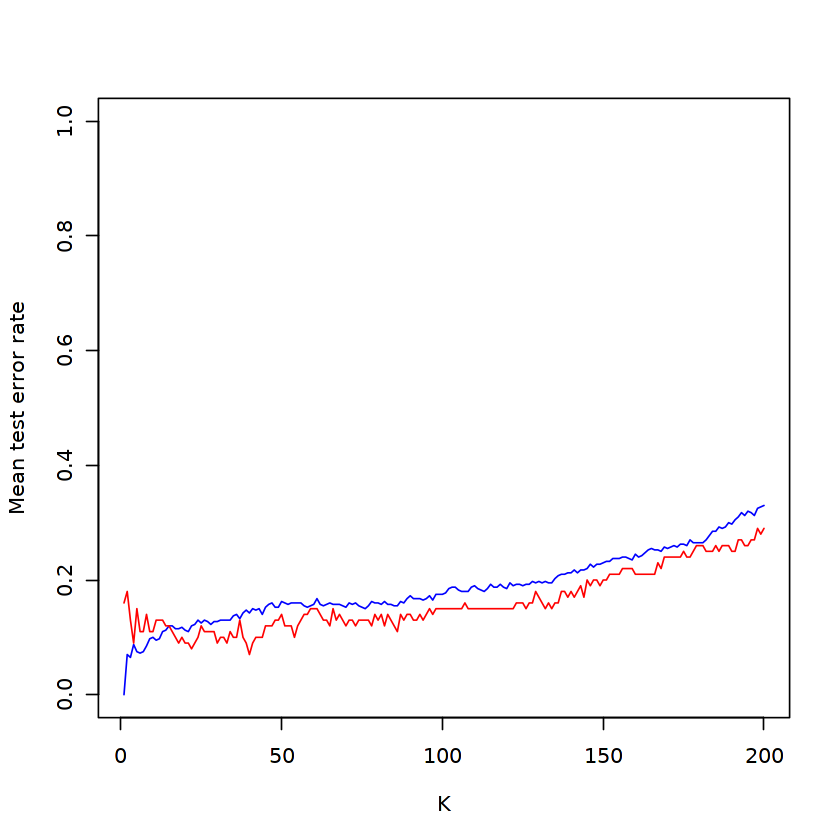

In [23]:
kvalues = 1:200
knn.train.err <- c()
knn.test.err <- c()
for(x in kvalues) {
    set.seed(1)
    knn.pred <- knn(train=X.train.new, test=X.train.new, cl=y.train, k=x)
    knn.train.err[x] <- mean(knn.pred != y.train)

    knn.pred <- knn(train=X.train.new, test=X.test.new, cl=y.train, k=x)
    knn.test.err[x] <- mean(knn.pred != y.test)

    #cmd <- sprintf("(k=%i) Train err: %f, Test err: %f", x, knn.train.err[x], knn.test.err[x])
    #print(eval(cmd))
}
nm.bestK = max(which(knn.test.err == min(knn.test.err)))

print(c(nm.bestK, knn.test.err[nm.bestK]))
plot(knn.train.err, ylim=c(0,1), xlab="K", ylab="Mean test error rate", type = "l", col="blue")
lines(knn.test.err, type='l', col="red")

knn.pred <- knn(train=X.train.new, test=X.test.new, cl=y.train, k=40)
knn.train.err <- mean(knn.pred != y.train)
knn.test.err <- mean(knn.pred != y.test)
table(y.test,knn.pred)
knn.train.err
knn.test.err


## Using PCA data

### Train/test performance

[1] 36.00  0.06


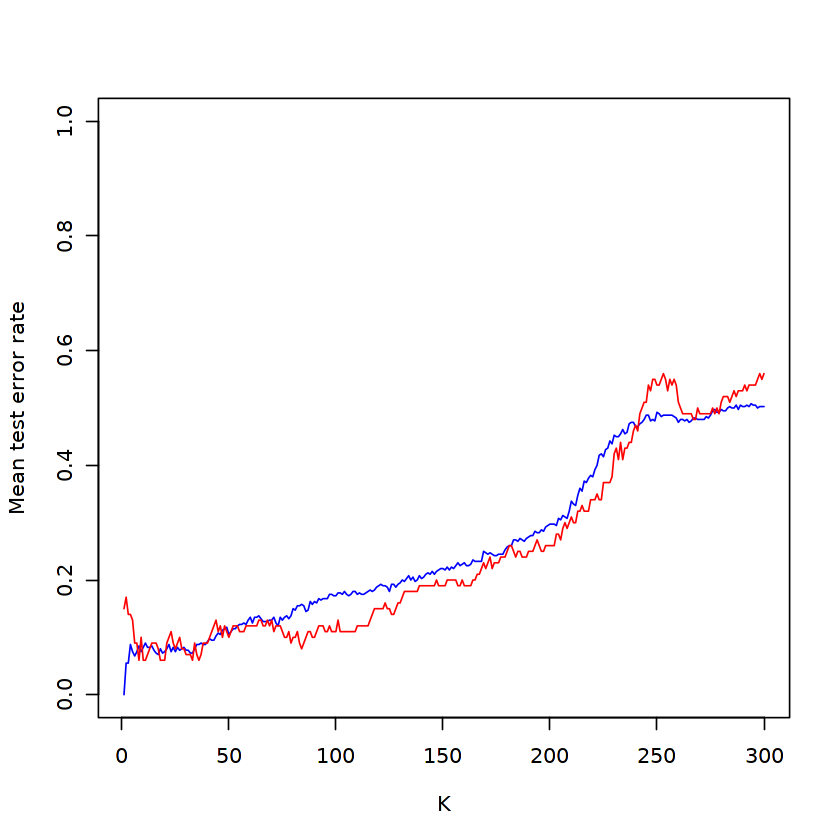

In [24]:
kvalues = 1:300
knn.train.err <- c()
knn.test.err <- c()
for(x in kvalues) {
    set.seed(1)
    knn.pred <- knn(train=X.train.pca, test=X.train.pca, cl=y.train, k=x)
    knn.train.err[x] <- mean(knn.pred != y.train)

    knn.pred <- knn(train=X.train.pca, test=X.test.pca, cl=y.train, k=x)
    knn.test.err[x] <- mean(knn.pred != y.test)

    #cmd <- sprintf("(k=%i) Train err: %f, Test err: %f", x, knn.train.err[x], knn.test.err[x])
    #print(eval(cmd))
}

pca.bestK = max(which(knn.test.err == min(knn.test.err)))

print(c(pca.bestK, knn.test.err[pca.bestK]))
plot(knn.train.err, ylim=c(0,1), xlab="K", ylab="Mean test error rate", type = "l", col="blue")
lines(knn.test.err, type='l', col="red")

## Domain knowledge data

[1] 40.00  0.07


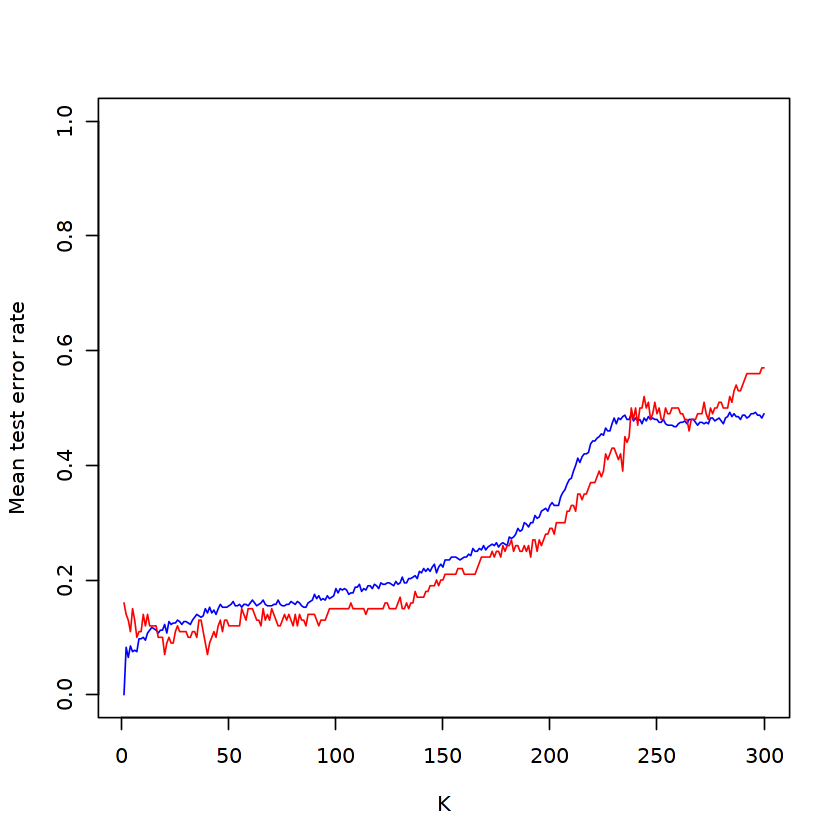

In [25]:
kvalues = 1:300
knn.train.err <- c()
knn.test.err <- c()
for(x in kvalues) {

    knn.pred <- knn(train=X.train.dm, test=X.train.dm, cl=y.train, k=x)
    knn.train.err[x] <- mean(knn.pred != y.train)

    knn.pred <- knn(train=X.train.dm, test=X.test.dm, cl=y.train, k=x)
    knn.test.err[x] <- mean(knn.pred != y.test)

    #cmd <- sprintf("(k=%i) Train err: %f, Test err: %f", x, knn.train.err[x], knn.test.err[x])
    #print(eval(cmd))
}

dm.bestK = max(which(knn.test.err == min(knn.test.err)))

print(c(dm.bestK, knn.test.err[dm.bestK]))
plot(knn.train.err, ylim=c(0,1), xlab="K", ylab="Mean test error rate", type = "l", col="blue")
lines(knn.test.err, type='l', col="red")

# Performance on entire dataset

We will use PCA-based selection for our final model!

In [26]:
final_data <- prcomp(df[,-21], scale=F)$x[,1:4] # first four components cumulative PVE 99.9%
y <- as.factor(df$price_range)
set.seed(1)
knn.pred <- knn(train=final_data, test=final_data, cl=y, k=40)
print(mean(knn.pred != y))
table(knn.pred, y)

[1] 0.084


        y
knn.pred   0   1   2   3
       0 111   3   0   0
       1   2 112  10   0
       2   0   7 108  14
       3   0   0   6 127

In [27]:
print(nm.bestK)
set.seed(1)
knn.pred <- knn(train=df[,-21], test=df[,-21], cl=y, k=nm.bestK)
knn.test.err <- mean(knn.pred != y)
table(knn.pred, y)
print(knn.test.err)


[1] 40


        y
knn.pred   0   1   2   3
       0 111   3   0   0
       1   2 113  11   0
       2   0   6 108  13
       3   0   0   5 128

[1] 0.08


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25ee153d-3a6e-4e0a-82a5-ebb29eafb1e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>